# Income vs. Life Satisfaction

In order to study if money makes people happy, I download the *Better Life Index data* from the [OECD's website](https://stats.oecd.org/index.aspx?DataSetCode=BLI) as well as statistics about GDP per capita from the [IMF's website](http://www.imf.org/external/pubs/ft/weo/2016/01/weodata/weorept.aspx?pr.x=32&pr.y=8&sy=2015&ey=2015&scsm=1&ssd=1&sort=country&ds=.&br=1&c=512%2C668%2C914%2C672%2C612%2C946%2C614%2C137%2C311%2C962%2C213%2C674%2C911%2C676%2C193%2C548%2C122%2C556%2C912%2C678%2C313%2C181%2C419%2C867%2C513%2C682%2C316%2C684%2C913%2C273%2C124%2C868%2C339%2C921%2C638%2C948%2C514%2C943%2C218%2C686%2C963%2C688%2C616%2C518%2C223%2C728%2C516%2C558%2C918%2C138%2C748%2C196%2C618%2C278%2C624%2C692%2C522%2C694%2C622%2C142%2C156%2C449%2C626%2C564%2C628%2C565%2C228%2C283%2C924%2C853%2C233%2C288%2C632%2C293%2C636%2C566%2C634%2C964%2C238%2C182%2C662%2C453%2C960%2C968%2C423%2C922%2C935%2C714%2C128%2C862%2C611%2C135%2C321%2C716%2C243%2C456%2C248%2C722%2C469%2C942%2C253%2C718%2C642%2C724%2C643%2C576%2C939%2C936%2C644%2C961%2C819%2C813%2C172%2C199%2C132%2C733%2C646%2C184%2C648%2C524%2C915%2C361%2C134%2C362%2C652%2C364%2C174%2C732%2C328%2C366%2C258%2C734%2C656%2C144%2C654%2C146%2C336%2C463%2C263%2C528%2C268%2C923%2C532%2C738%2C944%2C578%2C176%2C537%2C534%2C742%2C536%2C866%2C429%2C369%2C433%2C744%2C178%2C186%2C436%2C925%2C136%2C869%2C343%2C746%2C158%2C926%2C439%2C466%2C916%2C112%2C664%2C111%2C826%2C298%2C542%2C927%2C967%2C846%2C443%2C299%2C917%2C582%2C544%2C474%2C941%2C754%2C446%2C698%2C666&s=NGDPDPC&grp=0&a=).

In [1]:
# Import libraries to use

# Common imports
import numpy as np
import os
import pandas as pd
import sklearn.linear_model
from sklearn.model_selection import train_test_split

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt


## 1. Data Preparing

In [2]:
# This function just merges the OECD's life satisfaction data and the IMF's GDP per capita data. 
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    return full_country_stats[["GDP per capita", 'Life satisfaction']]

In [3]:
datapath = os.path.join("dataset", "")

In [44]:
# Load the data
oecd_bli = pd.read_csv(datapath + "oecd_bli_2015.csv", thousands=',')
gdp_per_capita = pd.read_csv(datapath + "gdp_per_capita.csv",thousands=',',delimiter='\t',
                             encoding='latin1', na_values="n/a")

# Overview dataframes of oecd_bli and gdp_per_capita
oecd_bli.head()

,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,1.1,E,Estimated value
1,AUT,Austria,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,1.0,NaN,NaN
2,BEL,Belgium,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,2.0,NaN,NaN
3,CAN,Canada,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,0.2,NaN,NaN
4,CZE,Czech Republic,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,0.9,NaN,NaN


In [45]:
gdp_per_capita.head()

,Country,Subject Descriptor,Units,Scale,Country/Series-specific Notes,2015,Estimates Start After
0,Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",599.994,2013.0
1,Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",3995.383,2010.0
2,Algeria,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4318.135,2014.0
3,Angola,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4100.315,2014.0
4,Antigua and Barbuda,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",14414.302,2011.0


In order to study the relation between life satisfaction and income, I extract values in column, "2015", and rename it as "GDP per capita" from table "gdp_per_capita"; extract values in column, "Value", and rename it as "Life satisfaction" from table "oecd_bli" by function, `prepare_country_stats`. 

In [6]:
# Prepare the data
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)

In [13]:
country_stats

,GDP per capita,Life satisfaction
Country,,
Brazil,8669.998,7.0
Mexico,9009.280,6.7
Russia,9054.914,6.0
Turkey,9437.372,5.6
Hungary,12239.894,4.9
Poland,12495.334,5.8
Chile,13340.905,6.7
Slovak Republic,15991.736,6.1
Czech Republic,17256.918,6.5


In [8]:
len(country_stats)

36

## 2. Visualize Data

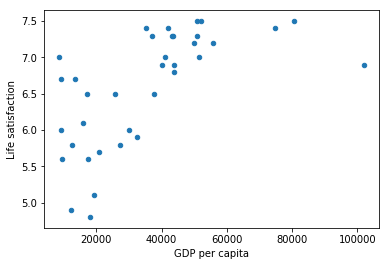

In [50]:
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

# Visualize the data
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')
plt.show()


From above plot, there does seem to be a trend here! It looks like life satisfaction goes up linearly as the country's GDP per capita increases. 

## 3. Clean Data

It is crucial to use a training set that is representative of the cases one wants to generalize to. According to the observation from above plot, there are some unreasonable data points. For example, from the table, "country_stats", the country's GDP per capita in Brazil is less than those in Mexico, Russia, and Turkey, but it has higher life satisfaction. Also, the country's GDP per capita in Luxembourg is the highest one, but the life satisfaction is much lower than those countries with close GDP. It seems that very rich countries are not happier than moderately rich countries, and conversely some poor countries seem happier than many rich countries. It does not make sense! Hence, I remove these data points before doing further analysis.

In [10]:
country_stats_new = country_stats.drop(['Brazil', 'Mexico', 'Chile', 'Norway', 'Switzerland', 'Luxembourg'])
country_stats_new.head()

,GDP per capita,Life satisfaction
Country,,
Russia,9054.914,6.0
Turkey,9437.372,5.6
Hungary,12239.894,4.9
Poland,12495.334,5.8
Slovak Republic,15991.736,6.1


In [14]:
len(country_stats_new)

30

## 4. Model Selection

As mentioned before, from the plot there is a linear trend between life satisfaction and GDP per capita. Thus, I now select a linear gression model of life satisfaction with just one attribute, GDP per capita. The prediction formula for a linear model is given by
$$ \hat{y} = w[0]*x[0] + w[1]*x[1] + \ldots + w[p]*x[p] + b$$,
where $x[0]$ to $x[p]$ denotes the features (in this case, the number of features is $p+1$) of a single data point, $w$ and $b$ are parameters of the linear model for training, and $\hat{y}$ is the prediction the model makes. In the current case, I choose a single feature so
$$ \hat{y} = w[0]*x[0]+ b $$
where $w[0]$ is GDP per capita in the country. The above equation is nothing but a line. Here, $w[0]$ is the slope and $b$ is the $y$-axis interception. The following codes are trying to learn the parameters $w[0]$ and $b$ from the traing samples such that the *mean squared error* is minimized.

In [37]:
# Training data
X_train = np.c_[country_stats["GDP per capita"]]
y_train = np.c_[country_stats["Life satisfaction"]]

# Set the random seed
random_seed = 2
# Split the train and the validation set for the fitting
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.1, random_state=random_seed)

In [38]:
# Select a linear model
model = sklearn.linear_model.LinearRegression()

# Train the model
lr = model.fit(X_train, y_train)

# w is the slope and b is the y-intercept
w = lr.coef_[0][0]
b = lr.intercept_[0]
print("w: {}".format(w))
print("b: {}".format(b))


w: 2.2145789987814916e-05
b: 5.793085904784464


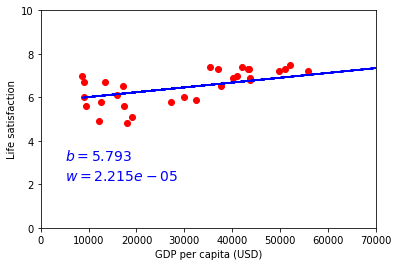

In [51]:
plt.plot(X_train, y_train,'ro')
plt.xlabel("GDP per capita (USD)")
plt.ylabel("Life satisfaction")
plt.axis([0, 70000, 0, 10])
X=np.linspace(0, 70000, 1000)
plt.plot(X_train, b + w*X_train, "b")
plt.text(5000, 3.1, "$b = %1.3f $" % b, fontsize=14, color="b")
plt.text(5000, 2.2, "$w = %1.3e $" % w, fontsize=14, color="b")
plt.show()


## 5. Evaluate the Model


In [40]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_val, y_val)))

Training set score: 0.38
Test set score: 0.62


From above results, although $R^2$ of test set is around 0.62, not good enough, the model generalize well compared to $R^2$ of training set. One can improve this by including more data points in the training. 

In [41]:
# Make a prediction for Cyprus
X_new = [[22587]]  # Cyprus' GDP per capita
print(model.predict(X_new)) 

[[6.29329286]]


From the table, country_stats, we can see that the Cyprus' GDP per capita is lower than Spain's GDP (Life satisfaction = 6.5) and higher than Slovenia's GDP (Life satisfaction = 5.7). Hence, it is reasonable that the predicted life satisfaction for Cyprus falls between 5.7 and 6.5.  